# **Important Pandas Dataframe Methods**

* Value_counts
* sort_values
* rank
* sort_index
* rename index -> rename
* unique and nunique
* isnull/notnull/hasnans
* dropna
* fillna
* drop_duplicates
* drop
* apply

In [58]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### 1 .  value_counts 

it is used in series as well as Dataframe in pandas


In [59]:
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])

marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [60]:
marks.value_counts()

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [61]:
ipl = pd.read_csv('ipl-matches.csv')


In [62]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [63]:
# find which player has won most player of the match -> in finals and qualifiers
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

In [64]:
# plot Toss Pie plot
ipl['TossDecision'].value_counts()

TossDecision
field    599
bat      351
Name: count, dtype: int64

<Axes: ylabel='count'>

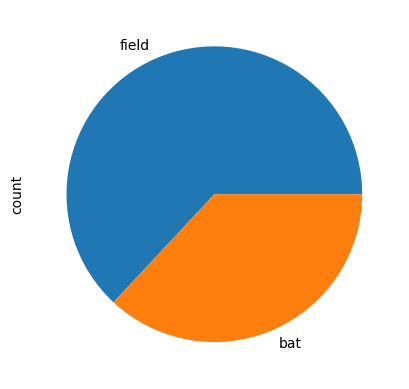

In [65]:
ipl['TossDecision'].value_counts().plot(kind='pie')

### 2. sort_values 


In [66]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [67]:
students.sort_values('name')

,name,college,branch,cgpa,package
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [68]:
students.sort_values('name',na_position='first',ascending=False)

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


### 3.sort_index(series and dataframe)

In [69]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [70]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

### 4.rename(dataframe) -> index

In [71]:
movies = pd.read_csv('movies.csv')

In [72]:
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [73]:
movies.set_index('title_x',inplace=True)

In [74]:
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)

In [75]:
movies.head(1)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


### 5. unique (Series) / nunique(series + dataframe) -> does not count nan -> dropna parameter

In [76]:
marks_series.unique()

array([ 67,  57,  89, 100], dtype=int64)

In [77]:
ipl['Season'].nunique()

15

### 6. isnull(series + dataframe)

In [78]:
students['name'][students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [79]:
# notnull(series + dataframe)
students['name'][students['name'].notnull()]

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [80]:
# hasnans(series)
students['name'].hasnans

True

In [81]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


### 7. dropna


In [82]:
students['name'].dropna()

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [83]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [84]:
students.dropna(how='any')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [85]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [86]:
students.dropna(subset=['name'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


In [87]:
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


### 8. fillna(series + dataframe)

In [88]:
students['name'].fillna('unknown')

0        nitish
1         ankit
2        rupesh
3       unknown
4    mrityunjay
5       unknown
6       rishabh
7       unknown
8        aditya
9       unknown
Name: name, dtype: object

In [89]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [90]:
students['name'].fillna(method='bfill')

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

### 9. drop_duplicates(series + dataframe) -> works like and -> duplicated()

In [92]:
# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'David'],
        'Age': [25, 30, 22, 25, 28],
        'City': ['New York', 'San Francisco', 'Los Angeles', 'New York', 'Chicago']}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Use the drop_duplicates method to remove duplicate rows based on all columns
df_no_duplicates = df.drop_duplicates()

# Display the DataFrame without duplicates
print("\nDataFrame after dropping duplicates:")
print(df_no_duplicates)


Original DataFrame:
      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   22    Los Angeles
3    Alice   25       New York
4    David   28        Chicago

DataFrame after dropping duplicates:
      Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   22    Los Angeles
4    David   28        Chicago


### 10 .drop(series + dataframe)

In [93]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [94]:
students.drop(columns=['branch','cgpa'],inplace=True)

In [95]:
students

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


### 11. apply

In [96]:
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [97]:
def euclidean(row):
  pt_A = row['1st point']
  pt_B = row['2nd point']

  return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

In [98]:
points_df['distance'] = points_df.apply(euclidean,axis=1)
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
